Requirments

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold,KFold
from sklearn.preprocessing import LabelEncoder # StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import BernoulliNB
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [2]:
df=pd.read_csv('Data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df=df.drop(columns=['customerID'])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


EDA

In [5]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   str    
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   str    
 3   Dependents        7043 non-null   str    
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   str    
 6   MultipleLines     7043 non-null   str    
 7   InternetService   7043 non-null   str    
 8   OnlineSecurity    7043 non-null   str    
 9   OnlineBackup      7043 non-null   str    
 10  DeviceProtection  7043 non-null   str    
 11  TechSupport       7043 non-null   str    
 12  StreamingTV       7043 non-null   str    
 13  StreamingMovies   7043 non-null   str    
 14  Contract          7043 non-null   str    
 15  PaperlessBilling  7043 non-null   str    
 16  PaymentMethod     7043 non-null   str    
 17  Monthl

In [6]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.dtypes

gender                  str
SeniorCitizen         int64
Partner                 str
Dependents              str
tenure                int64
PhoneService            str
MultipleLines           str
InternetService         str
OnlineSecurity          str
OnlineBackup            str
DeviceProtection        str
TechSupport             str
StreamingTV             str
StreamingMovies         str
Contract                str
PaperlessBilling        str
PaymentMethod           str
MonthlyCharges      float64
TotalCharges            str
Churn                   str
dtype: object

In [8]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

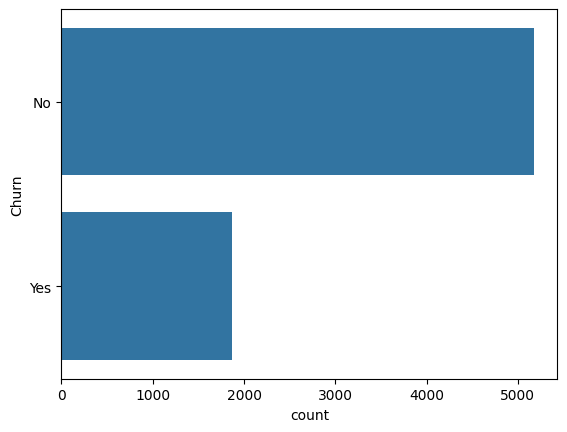

In [9]:
sn.countplot(df['Churn'])
plt.show()

In [10]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [11]:
print(f'Imbalance difference:{5174-1869}')

Imbalance difference:3305


imbalanced dataset

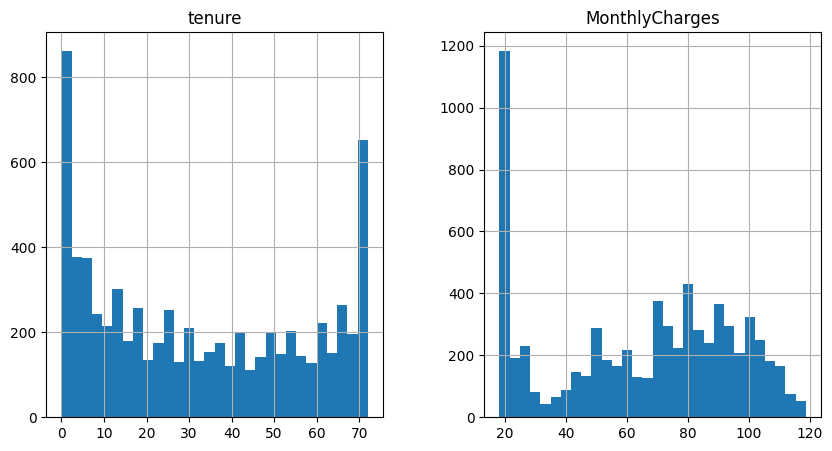

In [12]:
df[['tenure','MonthlyCharges','TotalCharges']].hist(bins=30,figsize=(10,5))
plt.show()

Many new and old customers are likely to churn.(tenure analysis). Higher charges often lead to churn.

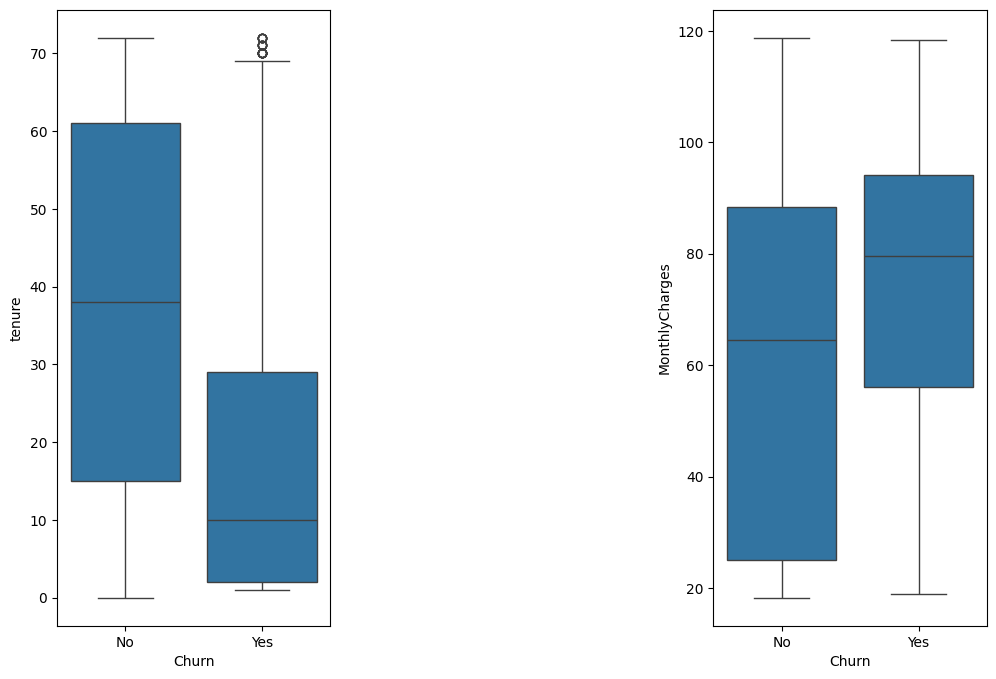

In [13]:
plt.figure(figsize=(12,8))

plt.subplot(1,3,1)
sn.boxplot(x='Churn',y='tenure',data=df)

plt.subplot(1,3,3)
sn.boxplot(x='Churn',y='MonthlyCharges',data=df)

plt.show()

Customers with low tenure are much more likely to churn.
Higher MonthlyCharges lead to high risk to churn

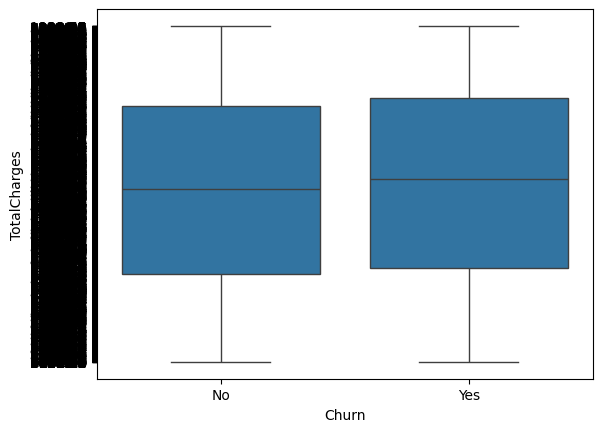

In [14]:
sn.boxplot(x='Churn',y='TotalCharges',data=df)
plt.show()

No significant to churn in TotalCharges feature

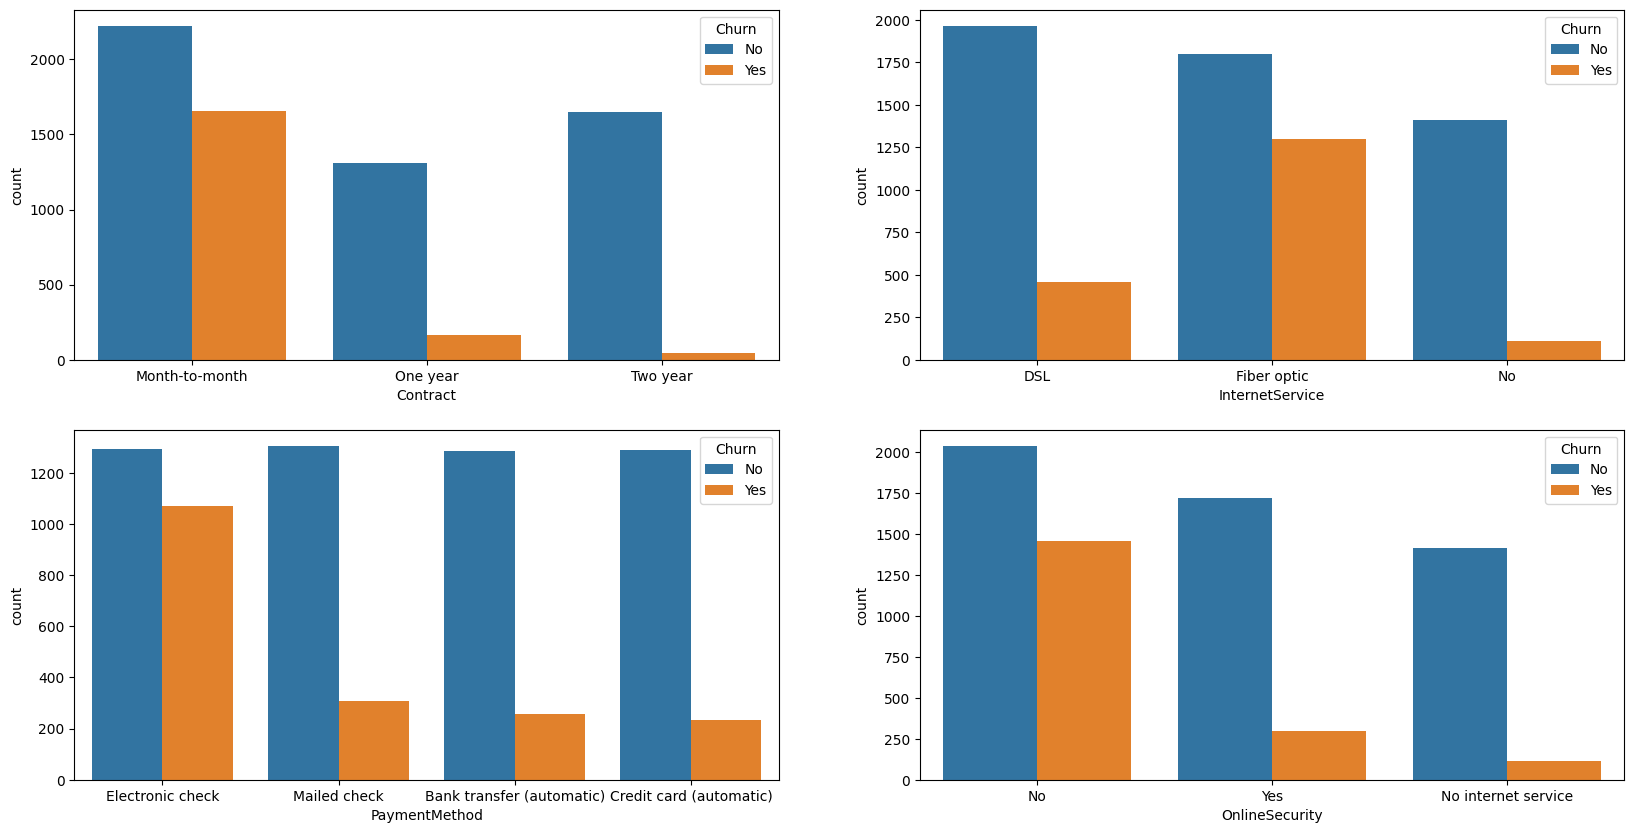

In [15]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
sn.countplot(x='Contract',hue='Churn',data=df)

plt.subplot(2,2,2)
sn.countplot(x='InternetService',hue='Churn',data=df)

plt.subplot(2,2,3)
sn.countplot(x='PaymentMethod',hue='Churn',data=df)

plt.subplot(2,2,4)
sn.countplot(x='OnlineSecurity',hue='Churn',data=df)

plt.show()

* Customers who choose Month-to-Month contract are most likely to churn
* Customers with Fiber Optic internet services are likely to churn
* Customers who uses electronic check as payment method have high risk of churn 
* Customers who don't have online security are more likely to churn

Preprocessing

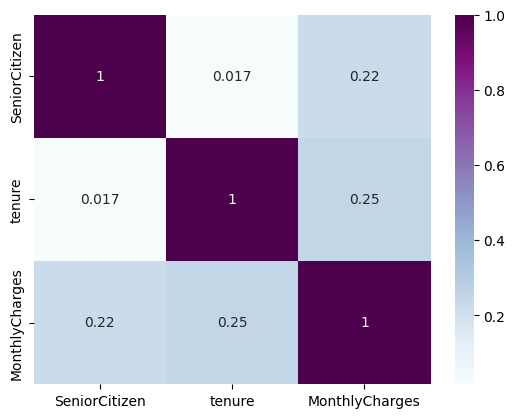

In [16]:
corr=df.corr(numeric_only=True)
sn.heatmap(corr,annot=True,cmap='BuPu')
plt.show()

In [17]:
df.dtypes

gender                  str
SeniorCitizen         int64
Partner                 str
Dependents              str
tenure                int64
PhoneService            str
MultipleLines           str
InternetService         str
OnlineSecurity          str
OnlineBackup            str
DeviceProtection        str
TechSupport             str
StreamingTV             str
StreamingMovies         str
Contract                str
PaperlessBilling        str
PaymentMethod           str
MonthlyCharges      float64
TotalCharges            str
Churn                   str
dtype: object

In [18]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

for i in df.columns:
    if df[i].dtype=='str':
        df[i]=encoder.fit_transform(df[i])
df.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges          int64
Churn                 int64
dtype: object

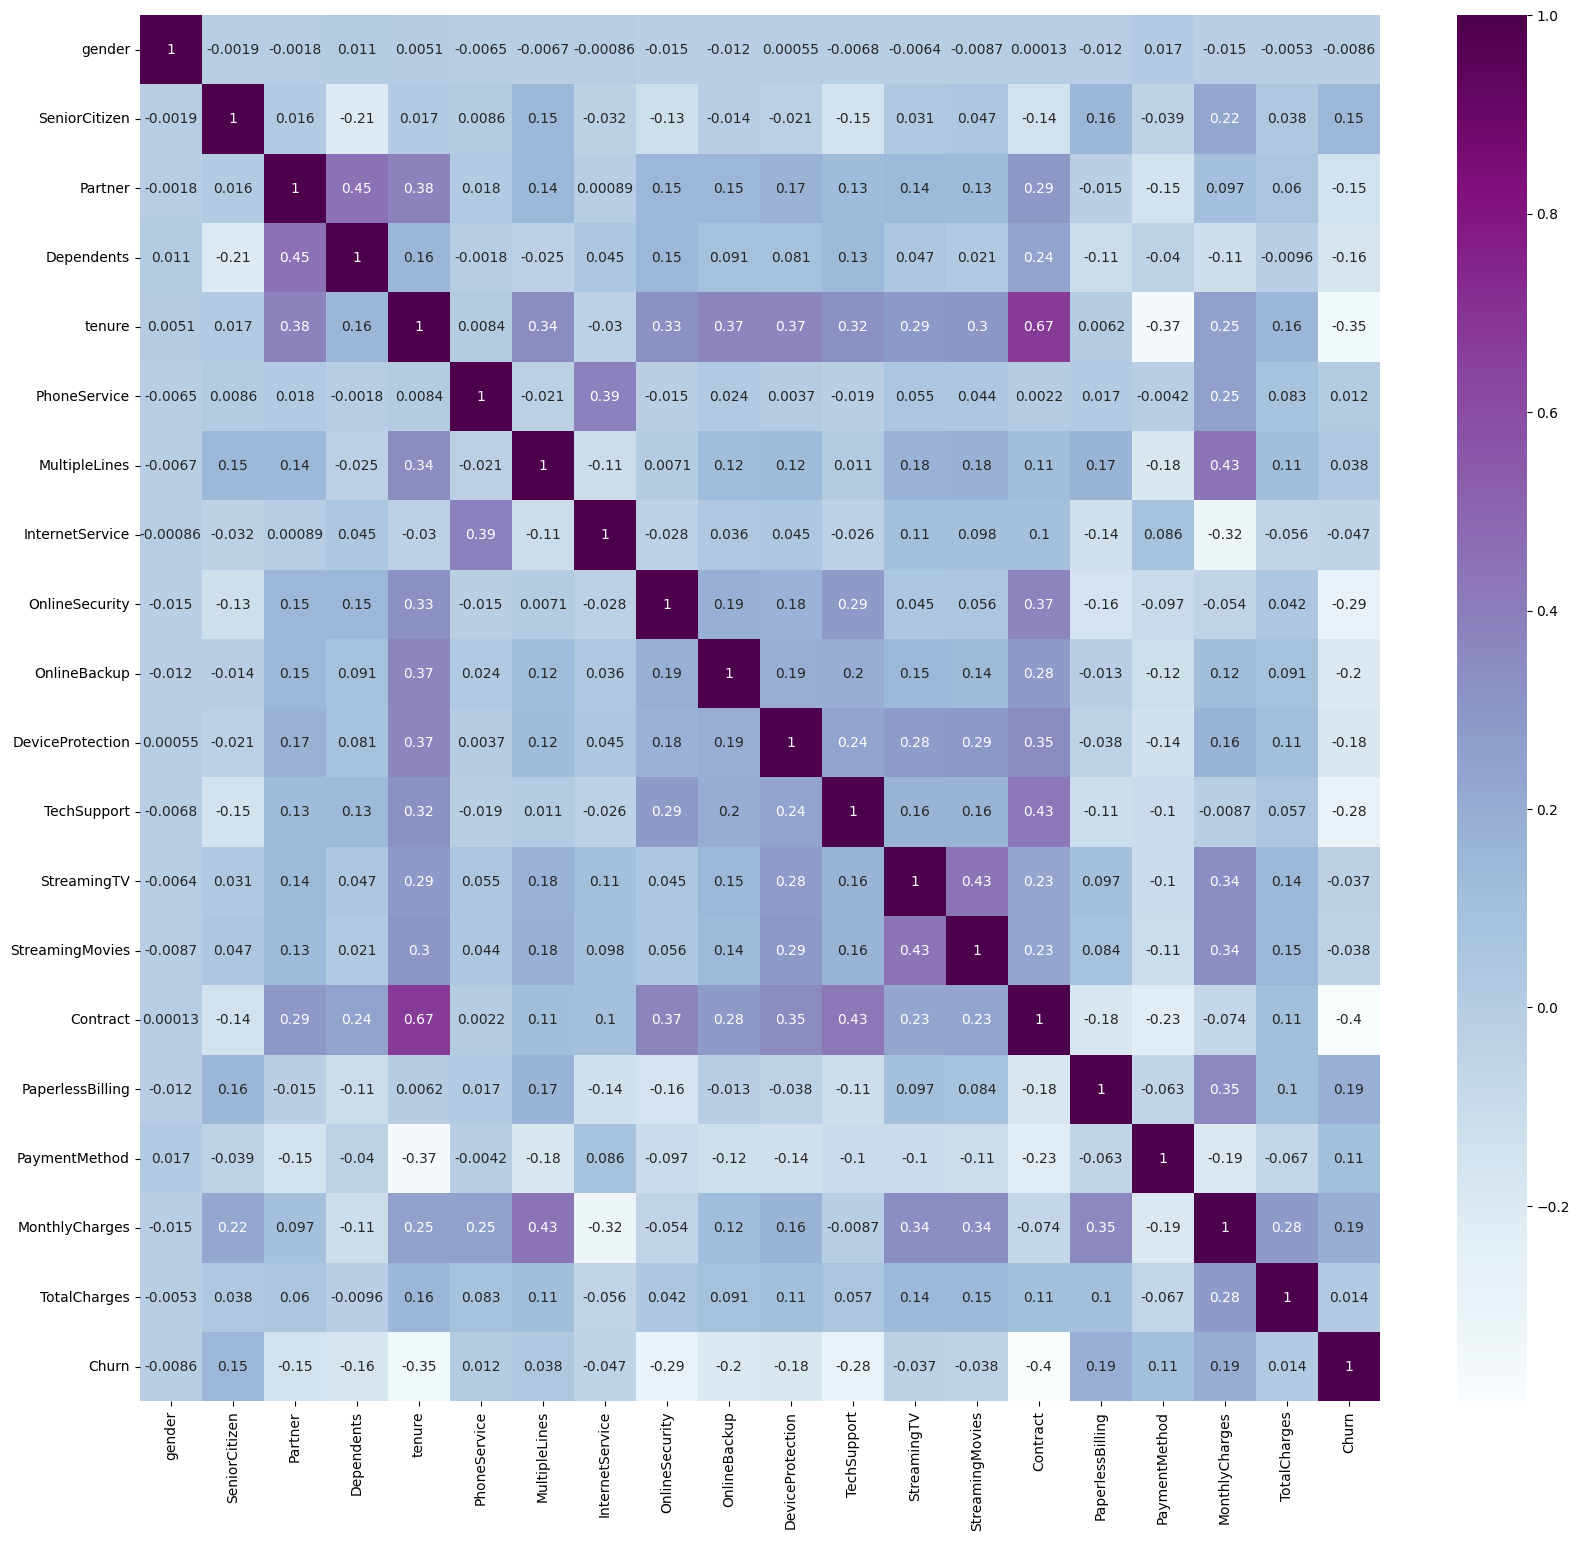

In [19]:
corr=df.corr()
plt.figure(figsize=(20,18))
sn.heatmap(corr,annot=True,cmap='BuPu')
plt.show()

* gender           : -0.0086 -> No predictive value (can be dropped)
* seniorcitizen    :  0.15   -> weak
* partner          : -0.15   -> strong
* Dependents       : -0.16   -> strong
* tenure           : -0.15   -> strong
* phoneservice     : 0.012   -> No predictive value (can be dropped)
* Multiplelines    : 0.038   -> No predictive value (can be dropped)
* internetservices : -0.047  -> moderate
* onlinesecurity   : -0.29   -> strong
* onlinebackup     : -0.2    -> strong
* Deviceprotection : -0.18   -> strong
* Techsupport      : -0.28   -> strong
* streamingTV      : -0.037  -> weak
* contract         : -0.4    -> strong
* paperlessbilling : 0.19    -> weak
* paymentmethod    : 0.11    -> weak
* Monthlycharges   : 0.19    -> weak
* totalcharges     : 0.014   -> No predictive value

Train - Test Split

In [20]:
x=df.drop(columns='Churn')
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925


In [21]:
y=df['Churn']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [22]:
print(x.shape)
print(y.shape)

(7043, 19)
(7043,)


In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

SMOTE

In [24]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()

In [25]:
print(x_train.shape)
print(y_train.shape)

(5634, 19)
(5634,)


In [26]:
x_train_smote, y_train_smote=smote.fit_resample(x_train, y_train)

print(x_train_smote.shape)
print(y_train_smote.shape)

(8276, 19)
(8276,)


Scalling is not required beacuse most of the models that im going to use doest not need a scalled data

Cross Validation

In [ ]:
LR_score=cross_val_score(LogisticRegression(),X=x_train_smote,y=y_train_smote,cv=5)
DT_score=cross_val_score(DecisionTreeClassifier(),X=x_train_smote,y=y_train_smote,cv=5)
RF_score=cross_val_score(RandomForestClassifier(random_state=42),X=x_train_smote,y=y_train_smote,cv=5)
KNN_score=cross_val_score(KNeighborsClassifier(),X=x_train_smote,y=y_train_smote,cv=5)
AD_score=cross_val_score(AdaBoostClassifier(random_state=42),X=x_train_smote,y=y_train_smote,cv=5)
GB_score=cross_val_score(GradientBoostingClassifier(random_state=42),X=x_train_smote,y=y_train_smote,cv=5)
Xg_score=cross_val_score(XGBClassifier(random_state=42),X=x_train_smote,y=y_train_smote,cv=5)
SVM_score=cross_val_score(SVC(random_state=42),X=x_train_smote,y=y_train_smote,cv=5)
Lgb_score=cross_val_score(LGBMClassifier(verbose=0,random_state=42),X=x_train_smote,y=y_train_smote,cv=5)
CB_score=cross_val_score(CatBoostClassifier(verbose=0,random_state=42),X=x_train_smote,y=y_train_smote,cv=5)
NB_score=cross_val_score(BernoulliNB(),X=x_train_smote,y=y_train_smote,cv=5)

/usr/local/python/3.12.1/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/python/3.12.1/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessi

[LightGBM] [Info] Number of positive: 3310, number of negative: 3310
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000697 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 626
[LightGBM] [Info] Number of data points in the train set: 6620, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 3311, number of negative: 3310
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000725 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 626
[LightGBM] [Info] Number of data points in the train set: 6621, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500076 -> initscore=0.000302
[L

In [35]:
print(f'Logistic Regression : { np.round(LR_score.mean()*100,2)}%')
print(f'Decision Tree : { np.round(DT_score.mean()*100,2)}%')
print(f'Random Forest : { np.round(RF_score.mean()*100,2)}%')
print(f'KNN : { np.round(KNN_score.mean()*100,2)}%')
print(f'AdaBoost : { np.round(AD_score.mean()*100,2)}%')
print(f'Gradient Boosting : { np.round(GB_score.mean()*100,2)}%')
print(f'XGBoost : { np.round(Xg_score.mean()*100,2)}%')
print(f'SVM : { np.round(SVM_score.mean()*100,2)}%')
print(f'LightGBM : { np.round(Lgb_score.mean()*100,2)}%')
print(f'CatBoost : { np.round(CB_score.mean()*100,2)}%')
print(f'BernoulliNB : { np.round(NB_score.mean()*100,2)}%')

Logistic Regression : 79.42%
Decision Tree : 78.02%
Random Forest : 83.99%
KNN : 76.53%
AdaBoost : 80.5%
Gradient Boosting : 81.91%
XGBoost : 83.46%
SVM : 57.08%
LightGBM : 83.58%
CatBoost : 83.35%
BernoulliNB : 76.78%


we are going to select top 5 models:
1. Random Forest : 83.640%
2. CatBoost      : 83.52%
3. LightGBM      : 83.38%
4. XGBoost       : 83.6%
5. Gradient      : 82.32%

Hyper Parameter Tuning

In [29]:
Rf=RandomForestClassifier(random_state=42)
Rf_params={'n_estimators':[100,150,200,300],
           'max_depth':[None,10,20,30]}
clf=GridSearchCV(Rf,Rf_params,cv=5,scoring='accuracy')
clf.fit(x_train_smote,y_train_smote)
print(clf.best_params_)
print(clf.best_score_ )

{'max_depth': None, 'n_estimators': 300}
0.8414835734197352


# Random Forest
* 'max_depth': 20
* 'n_estimators': 200
* 0.8414821139279305

In [32]:
Cb=CatBoostClassifier(verbose=0,random_state=42)
Cb_params={'iterations':[300,500],
    'learning_rate':[0.01,0.05,0.1],
    'depth':[4,6,8]
}
clf=GridSearchCV(Cb,Cb_params,cv=5,scoring='accuracy')
clf.fit(x_train_smote,y_train_smote)
print(clf.best_params_)
print(clf.best_score_)

{'depth': 8, 'iterations': 500, 'learning_rate': 0.05}
0.8390676036604054


# CatBoost
* 'depth': 8
* 'iterations': 500
* 'learning_rate': 0.05
* 0.8390676036604054

In [ ]:
Lg=LGBMClassifier(verbose=0,random_state=42)
Lg_params={'n_estimators':[150,200,300,500],
    'learning_rate':[0.01,0.05,0.1]
}
clf=GridSearchCV(Lg,Lg_params,cv=5,scoring='accuracy')
clf.fit(x_train_smote,y_train_smote)
print(clf.best_params_)
print(clf.best_score_)

{'learning_rate': 0.05, 'n_estimators': 500}
0.8370140986908359


# LigthGBM
* 'learning_rate': 0.05
* 'n_estimators': 500
* 0.8370140986908359

In [41]:
Xg=XGBClassifier(random_state=42)
Xg_params={'n_estimators':[150,200,300,500],
    'learning_rate':[0.01,0.05,0.1],
    'max_depth':[3,6]
}
clf=GridSearchCV(Xg,Xg_params,cv=5,scoring='accuracy')
clf.fit(x_train_smote,y_train_smote)
print(clf.best_params_)
print(clf.best_score_)

{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 150}
0.835080709896814


# XGBoost
* 'learning_rate': 0.1
* 'max_depth': 6
* 'n_estimators': 150
* 0.835080709896814

In [40]:
Gb=GradientBoostingClassifier(random_state=42)
Gb_params={'n_estimators':[150,200,300],
    'learning_rate':[0.01,0.05,0.1],
    'max_depth':[3,5]
    }
clf=GridSearchCV(Gb,Gb_params,cv=5,scoring='accuracy')
clf.fit(x_train_smote,y_train_smote)
print(clf.best_params_)
print(clf.best_score_)

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}
0.8329052643869405


# GradientBoost
* 'learning_rate': 0.1
* 'max_depth': 5
* n_estimators': 300
* 0.8329052643869405

# Top 3 Models :
1. Random Forest : 84.14 (max_depth=20,n_estimators=200)
2. CatBoost      : 83.90 (depth=8,iteration=500,learning_rate=0.05)
3. LightGBM      : 83.70 (learning_rate=0.05,n_estimators=500)

Model Evaluation

# Random Forest

In [47]:
model_1=RandomForestClassifier(n_estimators=200,max_depth=20,random_state=42)
model_1.fit(x_train_smote,y_train_smote)

Rf_pred_y=model_1.predict(x_test)
Rf_pred_y

array([1, 0, 0, ..., 0, 0, 0], shape=(1409,))

In [51]:
print(f'Accuracy : {model_1.score(x_test,y_test)*100}%')

Accuracy : 77.50177430801988%


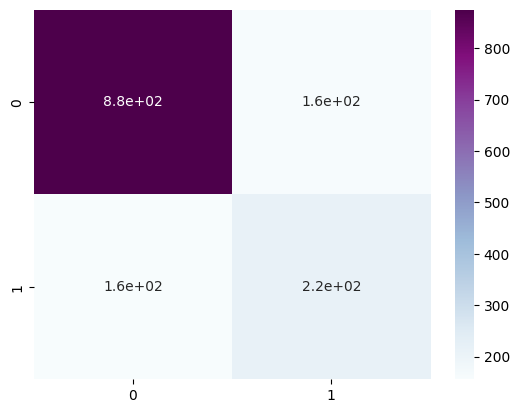

In [54]:
cm=confusion_matrix(y_test,Rf_pred_y)
cm
sn.heatmap(cm,annot=True,cmap='BuPu')
plt.show()

In [55]:
print(classification_report(y_test,Rf_pred_y))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1036
           1       0.57      0.58      0.58       373

    accuracy                           0.78      1409
   macro avg       0.71      0.71      0.71      1409
weighted avg       0.78      0.78      0.78      1409



# CatBoost

In [56]:
model_2=CatBoostClassifier(iterations=500,learning_rate=0.05,depth=8,verbose=0,random_state=42)
model_2.fit(x_train_smote,y_train_smote)

Cb_pred_y=model_2.predict(x_test)
Cb_pred_y

array([1, 0, 0, ..., 0, 0, 0], shape=(1409,))

In [ ]:
print(f'Accuracy : {model_2.score(x_test,y_test)*100}')

79.06316536550744


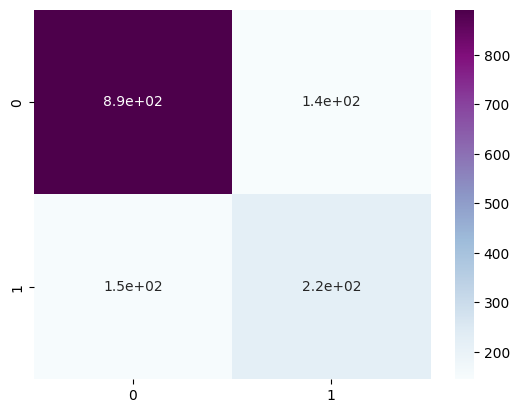

In [58]:
cm=confusion_matrix(y_test,Cb_pred_y)
cm
sn.heatmap(cm,annot=True,cmap='BuPu')
plt.show()

In [59]:
print(classification_report(y_test,Rf_pred_y))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1036
           1       0.57      0.58      0.58       373

    accuracy                           0.78      1409
   macro avg       0.71      0.71      0.71      1409
weighted avg       0.78      0.78      0.78      1409



# LightGBM

In [60]:
model_3=LGBMClassifier(n_estimators=500,learning_rate=0.05,random_state=42,verbose=0)
model_3.fit(x_train_smote,y_train_smote)

Lg_pred_y=model_3.predict(x_test)
Lg_pred_y

array([1, 0, 0, ..., 0, 0, 1], shape=(1409,))

In [61]:
print(f'Accuracy : {model_2.score(x_test,y_test)*100}')

Accuracy : 79.06316536550744


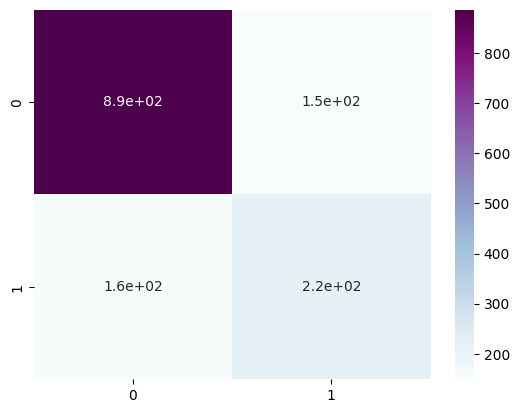

In [62]:
cm=confusion_matrix(y_test,Lg_pred_y)
cm
sn.heatmap(cm,annot=True,cmap='BuPu')
plt.show()

In [63]:
print(classification_report(y_test,Lg_pred_y))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1036
           1       0.59      0.58      0.59       373

    accuracy                           0.78      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409



We choose LightGBM as our final model but it need a few tweeks

Threshold Tuning

In [64]:
model=LGBMClassifier(n_estimators=500,learning_rate=0.05,random_state=42,verbose=0)
model.fit(x_train_smote,y_train_smote)  

y_prob=model.predict_proba(x_test)[:,1]
y_pred=np.where(y_prob>0.3,1,0)

In [65]:
print(f'Accuracy : {model.score(x_test,y_test)*100}')

Accuracy : 78.42441447835344


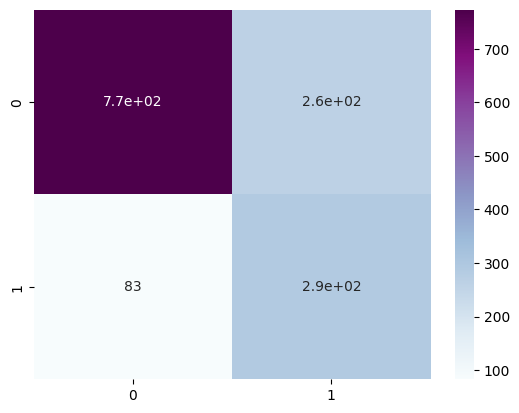

In [66]:
cm=confusion_matrix(y_test,y_pred)
cm
sn.heatmap(cm,annot=True,cmap='BuPu')
plt.show()

In [67]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1036
           1       0.52      0.78      0.63       373

    accuracy                           0.75      1409
   macro avg       0.71      0.76      0.72      1409
weighted avg       0.80      0.75      0.77      1409



# ROC_AUC

In [70]:
from sklearn.metrics import roc_auc_score, roc_curve

false_positive,true_positive,thresholds=roc_curve(y_test,y_prob)
auc=roc_auc_score(y_test,y_prob)

print(f'AUC: {auc:.3f}')

AUC: 0.834


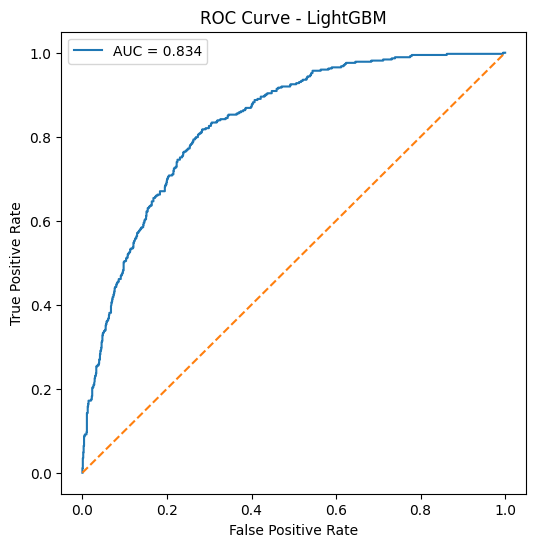

In [ ]:
plt.figure(figsize=(6,6))
plt.plot(false_positive,true_positive,label=f"AUC={auc:.3f}")
plt.plot([0,1],[0,1],linestyle='--')  # baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - LightGBM")
plt.legend()
plt.show()

Model Deployement

In [71]:
import joblib

In [72]:
joblib.dump(model,'Models/customer_churn_model.pkl')
joblib.dump(x_train_smote.columns.to_list(),'Models/feature_columns.pkl')

['Models/feature_columns.pkl']

PowerBI Exports

In [73]:
Train_df=x_train_smote.copy()
Train_df["Churn"]=y_train_smote.values

Train_df.to_csv("PowerBI/training_data.csv", index=False)

In [75]:
pred_df=x_test.copy()
pred_df["Actual Value"]=y_test.values
pred_df["Predicted Value"]=y_pred

pred_df.to_csv("PowerBI/predictions.csv", index=False)

In [77]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print(f'Final Accuracy: {accuracy*100:.2f}%')

accuracy_df=pd.DataFrame({
    'Metrics':['Accuracy'],
    'Value':[accuracy]
})
accuracy_df.to_csv("PowerBI/accuracy_metrics.csv", index=False)

Final Accuracy: 75.44%


In [78]:
report=classification_report(y_test, y_pred,output_dict=True) #covert to dictionary
report=pd.DataFrame(report).transpose() #formatting

report.to_csv("PowerBI/classification_report.csv")

In [79]:
df.to_csv('Data/cleaned_churn_data.csv', index=False)